<a href="https://colab.research.google.com/github/DeusExMachina1993/Deep-Computer-Vision/blob/master/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Project3: **Feature Extraction**

###**SIFT (Scale-Invariant Feature Transform) - Feature matching**

The scale-invariant feature transform (SIFT) is a feature detection algorithm in computer vision to detect and describe local features in images. It was patented in Canada by the University of British Columbia and published by David Lowe in 1999. Applications include object recognition, robotic mapping and navigation, image stitching, 3D modeling, gesture recognition, video tracking, individual identification of wildlife and match moving.

SIFT keypoints of objects are first extracted from a set of reference images and stored in a database. An object is recognized in a new image by individually comparing each feature from the new image to this database and finding candidate matching features based on Euclidean distance of their feature vectors. From the full set of matches, subsets of keypoints that agree on the object and its location, scale, and orientation in the new image are identified to filter out good matches. The determination of consistent clusters is performed rapidly by using an efficient hash table implementation of the generalised Hough transform. Each cluster of 3 or more features that agree on an object and its pose is then subject to further detailed model verification and subsequently outliers are discarded. Finally the probability that a particular set of features indicates the presence of an object is computed, given the accuracy of fit and number of probable false matches. Object matches that pass all these tests can be identified as correct with high confidence.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Sift_keypoints_filtering.jpg/220px-Sift_keypoints_filtering.jpg)

In [1]:
!wget https://pns2019.github.io/images/Lenna.png

--2020-01-20 11:05:33--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.02s   

2020-01-20 11:05:34 (20.9 MB/s) - ‘Lenna.png’ saved [473831/473831]



Because SIFT Algo is not available in opencv as its patented but its present in opencv_contrib-python,hence we pip install the same

In [2]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 143kB/s 
     |████████████████████████████████| 20.2MB 207kB/s 
ERROR: tensor2tensor 1.14.1 requires opencv-python, which is not installed.
ERROR: stable-baselines 2.2.1 requires opencv-python, which is not installed.
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: gym 0.15.4 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5
  Foun

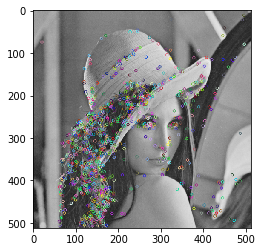

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# for opencv 3.x and above
# you will need to run the following code to install
# pip install opencv-contrib-python -U
sift = cv2.xfeatures2d.SIFT_create()
# for raspberry pi
# sift = cv2.SIFT()

kp = sift.detect(gray, None)

# for opencv 3.x and above
cv2.drawKeypoints(gray, kp, img)
# for Raspberry Pi
# img = cv2.drawKeypoints(gray, kp)

plt.figure()
plt.imshow(img)
plt.show()

In this section, we will take a look at one such feature extraction technique, the Histogram of Oriented Gradients (HOG), which transforms image pixels into a vector representation that is sensitive to broadly informative image features regardless of confounding factors like illumination. We will use these features to develop a simple face detection pipeline, using machine learning algorithms and concepts we've seen throughout this chapter.

We begin with the standard imports:

##**HOG Features**

The Histogram of Gradients is a straightforward feature extraction procedure that was developed in the context of identifying pedestrians within images. HOG involves the following steps:

1.   Optionally pre-normalize images. This leads to features that resist dependence on variations in illumination.
2.   Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contour, and texture information.
3.   Subdivide the image into cells of a predetermined size, and compute a histogram of the gradient orientations within each cell.
4.   Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illumination across the image.
5.   Construct a one-dimensional feature vector from the information in each cell.



A fast HOG extractor is built into the Scikit-Image project, and we can try it out relatively quickly and visualize the oriented gradients within each cell:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

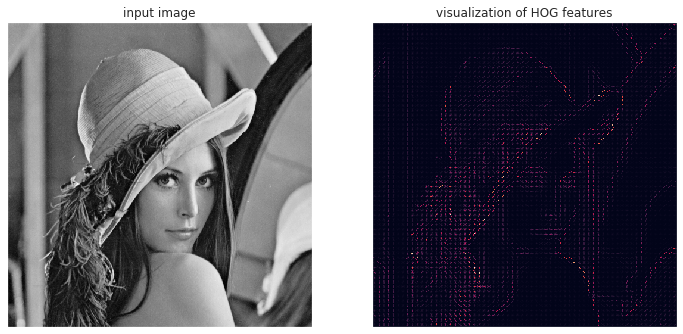

In [16]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(gray,visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');